# Variational Autoencoder (VAE) Tutorial

## Introduction

A Variational Autoencoder (VAE) is a generative model that learns a probability distribution over the input data. Unlike traditional autoencoders, VAEs impose a probabilistic structure on the latent space, enabling them to generate new data points similar to the training data.

## Architecture

A VAE consists of three main parts:
1. **Encoder**: Maps the input to a mean and variance of the latent space distribution.
2. **Sampling**: Samples from the latent space distribution.
3. **Decoder**: Reconstructs the input from the sampled latent variable.

### Encoder

The encoder maps the input $x$ to a mean $\mu$ and a log-variance $\log(\sigma^2)$ of the latent space distribution. Mathematically, this can be written as:

$$
\mu = f_{\mu}(x)
$$

$$
\log(\sigma^2) = f_{\log(\sigma^2)}(x)
$$

### Sampling

The latent variable $z$ is sampled from the distribution $\mathcal{N}(\mu, \sigma^2)$ using the reparameterization trick:

$$
z = \mu + \sigma \odot \epsilon
$$

where $\epsilon \sim \mathcal{N}(0, I)$.

### Decoder

The decoder maps the latent variable $z$ back to the input space:

$$
\hat{x} = g(z)
$$

### Loss Function

The loss function for a VAE consists of two parts:
1. **Reconstruction Loss**: Measures how well the decoder reconstructs the input.
2. **KL Divergence**: Measures how much the learned latent distribution deviates from the prior distribution (usually a standard normal distribution).

The total loss is:

$$
L = \text{Reconstruction Loss} + \text{KL Divergence}
$$

#### Reconstruction Loss

The reconstruction loss is typically the binary cross-entropy loss:

$$
\text{Reconstruction Loss} = \sum_{i} x_i \log(\hat{x}_i) + (1 - x_i) \log(1 - \hat{x}_i)
$$

#### KL Divergence

The KL divergence between the learned latent distribution and the prior distribution is:

$$
\text{KL Divergence} = -\frac{1}{2} \sum_{j=1}^{d} \left(1 + \log(\sigma_j^2) - \mu_j^2 - \sigma_j^2 \right)
$$

where $d$ is the dimension of the latent space.

## Training the VAE

Training the VAE involves minimizing the loss function with respect to the weights and biases of the encoder and decoder. This is typically done using gradient descent.

### Derivatives

Let's derive the gradients for the encoder and decoder weights.

#### Decoder Gradients

For the decoder, the gradient of the loss function with respect to the decoder weights $W_d$ is:

$$
\frac{\partial L}{\partial W_d} = \frac{\partial L}{\partial \hat{x}} \cdot \frac{\partial \hat{x}}{\partial W_d}
$$

Since $\hat{x} = g(z) = \sigma(W_d z + b_d)$, we have:

$$
\frac{\partial \hat{x}}{\partial W_d} = z \cdot \sigma'(W_d z + b_d)
$$

Thus,

$$
\frac{\partial L}{\partial W_d} = (x - \hat{x}) \cdot \sigma'(W_d z + b_d) \cdot z^T
$$

#### Encoder Gradients

For the encoder, the gradient of the loss function with respect to the encoder weights $W_e$ involves the gradients for both the mean and log-variance.

##### Gradient for $\mu$:

$$
\frac{\partial L}{\partial \mu} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial \mu}
$$

Since $z = \mu + \sigma \odot \epsilon$, we have:

$$
\frac{\partial z}{\partial \mu} = 1
$$

Thus,

$$
\frac{\partial L}{\partial \mu} = \frac{\partial L}{\partial z}
$$

And,

$$
\frac{\partial L}{\partial W_{e, \mu}} = \frac{\partial L}{\partial \mu} \cdot \frac{\partial \mu}{\partial W_{e, \mu}} = \frac{\partial L}{\partial z} \cdot x
$$

##### Gradient for $\log(\sigma^2)$:

$$
\frac{\partial L}{\partial \log(\sigma^2)} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial \log(\sigma^2)}
$$

Since $z = \mu + \sigma \odot \epsilon$ and $\sigma = \exp(0.5 \log(\sigma^2))$, we have:

$$
\frac{\partial z}{\partial \log(\sigma^2)} = \epsilon \cdot \sigma \cdot 0.5
$$

Thus,

$$
\frac{\partial L}{\partial \log(\sigma^2)} = \frac{\partial L}{\partial z} \cdot \epsilon \cdot \sigma \cdot 0.5
$$

And,

$$
\frac{\partial L}{\partial W_{e, \log(\sigma^2)}} = \frac{\partial L}{\partial \log(\sigma^2)} \cdot \frac{\partial \log(\sigma^2)}{\partial W_{e, \log(\sigma^2)}} = \frac{\partial L}{\partial z} \cdot \epsilon \cdot \sigma \cdot 0.5 \cdot x
$$

### Gradient Descent Update

The weights and biases are updated using the gradients:

$$
W \leftarrow W - \eta \frac{\partial L}{\partial W}
$$

$$
b \leftarrow b - \eta \frac{\partial L}{\partial b}
$$

where $\eta$ is the learning rate.

## Innovations and Techniques

### Reparameterization Trick

The reparameterization trick allows for end-to-end training of the VAE by decoupling the stochasticity of $( z )$ from the model parameters $( \phi )$.

### KL Annealing

To stabilize training and improve convergence, KL annealing gradually increases the weight of the KL divergence term in the loss function during training.

### Importance of Latent Space Regularization

Regularizing the latent space promotes disentanglement of latent variables, making them more interpretable and improving the generative capabilities of the model.

# Advantages and Drawbacks

## Advantages
- **Generative Model**: VAEs can generate new data points from the learned latent space distribution, enabling creativity and exploration.
- **Probabilistic Representation**: VAEs provide a probabilistic interpretation of data, allowing uncertainty estimation and robustness.
- **Disentangled Representation**: By regularizing the latent space, VAEs encourage disentangled representations, which can aid in interpretability.

## Drawbacks
- **Approximate Inference**: VAEs use variational inference to approximate the posterior distribution, which may introduce approximation errors.
- **Complex Training**: Training VAEs requires careful tuning of hyperparameters, such as learning rates and KL divergence weight.
- **Mode Collapse**: In some cases, VAEs may suffer from mode collapse, where the model generates limited diversity in generated samples.



Epoch 1/50
235/235 [==============================] - 8s 28ms/step - loss: 225.2693 - val_loss: 186.3493
Epoch 2/50
235/235 [==============================] - 5s 22ms/step - loss: 180.2317 - val_loss: 173.7315
Epoch 3/50
235/235 [==============================] - 7s 29ms/step - loss: 171.0512 - val_loss: 168.7554
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 167.5757 - val_loss: 166.5316
Epoch 5/50
235/235 [==============================] - 8s 34ms/step - loss: 165.7483 - val_loss: 165.0327
Epoch 6/50
235/235 [==============================] - 5s 23ms/step - loss: 164.4238 - val_loss: 163.9096
Epoch 7/50
235/235 [==============================] - 6s 27ms/step - loss: 163.3624 - val_loss: 163.0497
Epoch 8/50
235/235 [==============================] - 6s 24ms/step - loss: 162.4901 - val_loss: 162.2163
Epoch 9/50
235/235 [==============================] - 5s 23ms/step - loss: 161.7023 - val_loss: 161.4971
Epoch 10/50
235/235 [==============================] - 

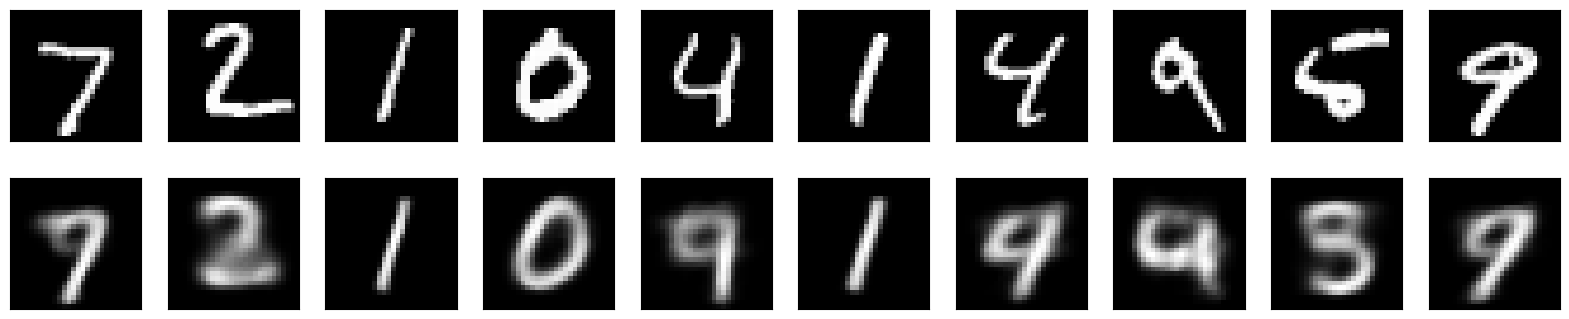

In [ ]:


import numpy as np
from keras.layers import Input, Dense, Lambda, Layer
from keras.models import Model
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from keras import backend as K
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the VAE architecture
input_dim = 784
intermediate_dim = 256
latent_dim = 2

inputs = Input(shape=(input_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Create encoder
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# Create decoder
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
decoder_h = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(input_dim, activation='sigmoid')(decoder_h)
decoder = Model(latent_inputs, outputs, name='decoder')

# Instantiate VAE
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

# Define VAE loss
reconstruction_loss = binary_crossentropy(inputs, outputs)
reconstruction_loss *= input_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer=Adam())

# Train the VAE
vae.fit(x_train, epochs=50, batch_size=256, validation_data=(x_test, None))

# Display original and reconstructed images
def plot_results(models, data, batch_size=128, model_name="vae_mnist"):
    encoder, decoder = models
    x_test, y_test = data

    z_mean, _, _ = encoder.predict(x_test, batch_size=batch_size)
    x_decoded = decoder.predict(z_mean, batch_size=batch_size)

    plt.figure(figsize=(20, 4))
    for i in range(10):
        # display original
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, 10, i + 1 + 10)
        plt.imshow(x_decoded[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Plot results
plot_results((encoder, decoder), (x_test, None))
